# **Exploratory Data Analysis on Online Course Enrollment Data**


## Objectives


* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students


----


install necessary pacakages

In [23]:
!pip install seaborn
!pip install wordcloud
!pip install pandas
!pip install matplotlib

import necessary class/methods in the packages


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [25]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [26]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [27]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [28]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [29]:
print(f"total unique courses in the data {course_df.shape[0]}")

total unique courses in the data 307


Then we can take a quick look at its header rows


In [30]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [31]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [32]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [33]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [34]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [35]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [36]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [37]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


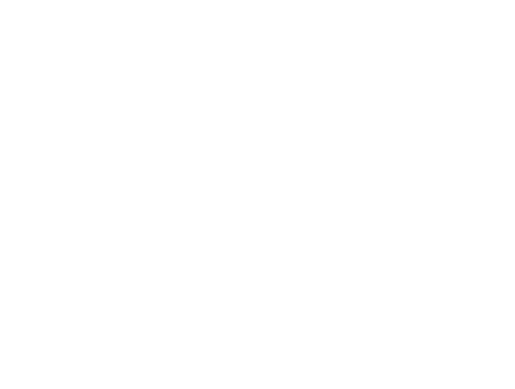

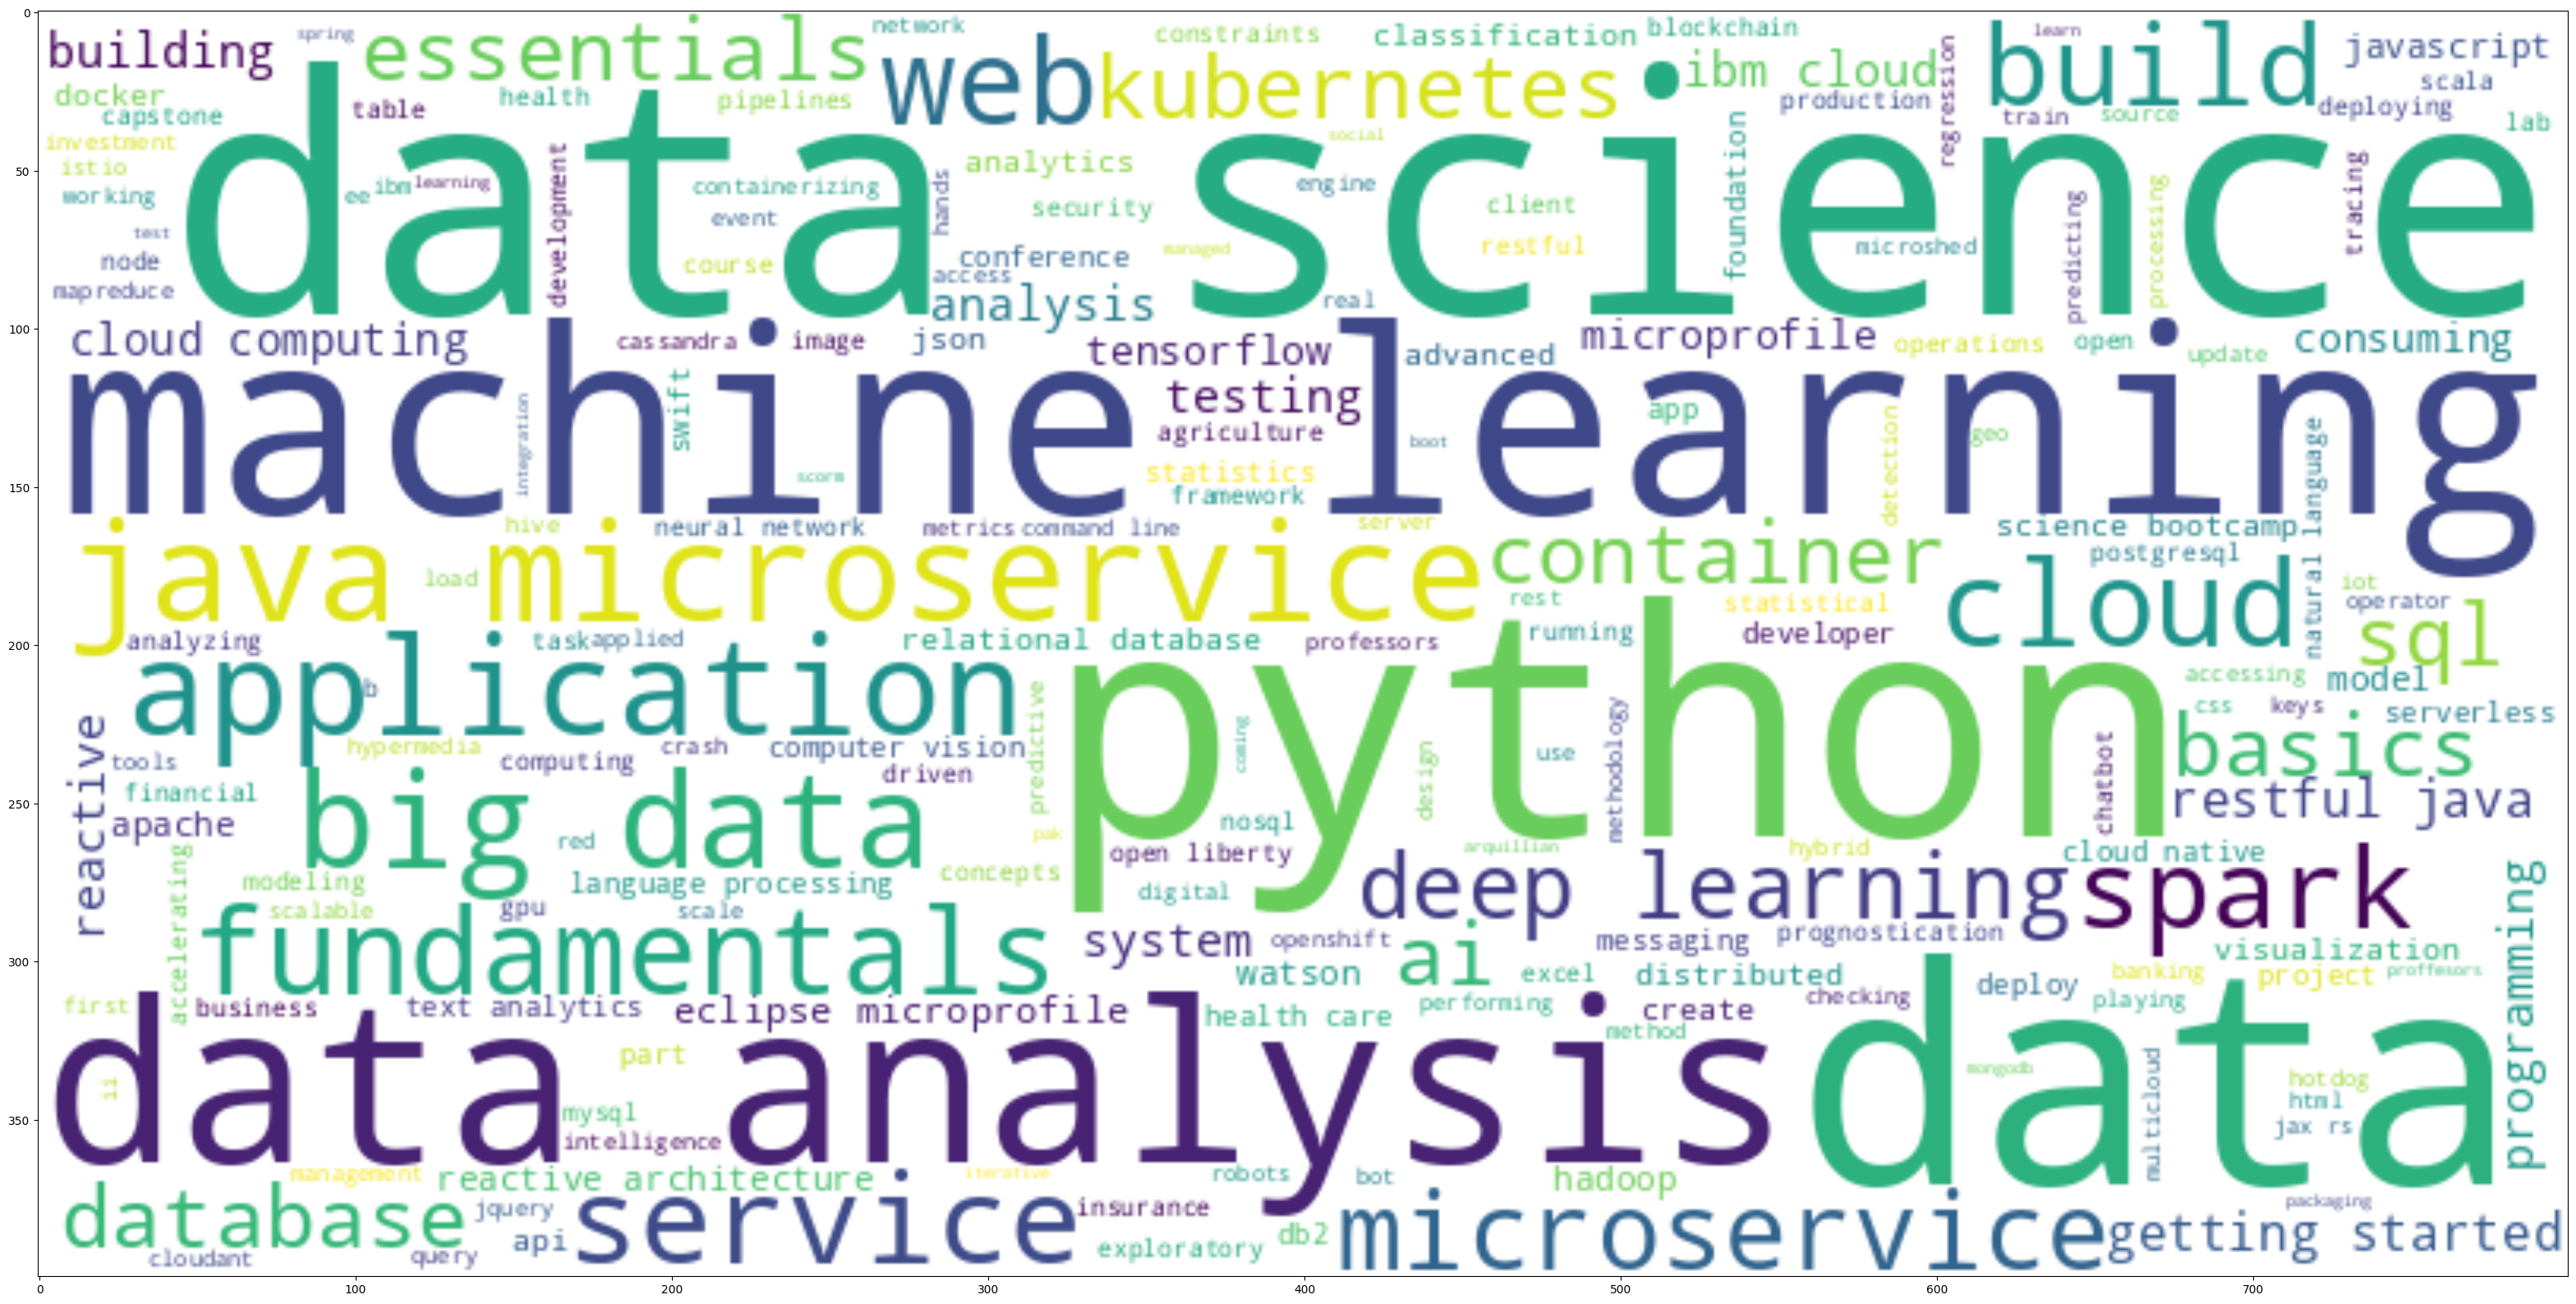

In [56]:
plt.axis("off")
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


### Analyze Course Genres


First, we can find out which courses may be of interest you. For example, what are the all machine learning related courses?


In [57]:
ml_courses = course_df[course_df['MachineLearning'] == 1]
print(ml_courses.head())

   COURSE_ID                                     TITLE  Database  Python  \
1   ML0122EN       accelerating deep learning with gpu         0       1   
15  DAI101EN                      data   ai essentials         0       0   
19  HCC105EN  ybrid cloud conference  ai pipelines lab         0       0   
21  DS0132EN         data   ai  jumpstart your journey         0       0   
24  BENTEST4        ai for everyone  master the basics         0       0   

    CloudComputing  DataAnalysis  Containers  MachineLearning  ComputerVision  \
1                0             0           0                1               0   
15               0             0           0                1               0   
19               0             0           0                1               0   
21               0             0           0                1               0   
24               0             0           0                1               0   

    DataScience  BigData  Chatbot  R  BackendDev  Fronte

Similarly, we can find out what are the scalable machine learning courses?


In [58]:
scalable_ml_courses = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]
print(scalable_ml_courses.head())

      COURSE_ID                                              TITLE  Database  \
46   GPXX0BUBEN  insurance risk assessment with montecarlo meth...         0   
59     TA0106EN                            text analytics at scale         0   
184    BD0221EN                                        spark mllib         0   
282  excourse69                     machine learning with big data         0   

     Python  CloudComputing  DataAnalysis  Containers  MachineLearning  \
46        0               0             0           0                1   
59        0               0             0           0                1   
184       0               0             0           0                1   
282       0               0             0           0                1   

     ComputerVision  DataScience  BigData  Chatbot  R  BackendDev  \
46                0            0        1        0  0           0   
59                0            1        1        0  0           0   
184               0  

In [59]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


In [60]:
genre_sums = course_df[genres].sum(axis = 0)
popular_genres = pd.DataFrame(genre_sums, columns = ["COUNT"])
popular_genres = popular_genres.sort_values(by="COUNT", ascending=False)
popular_genres

,COUNT
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


We can also visualize course genre counts using a bar chart:


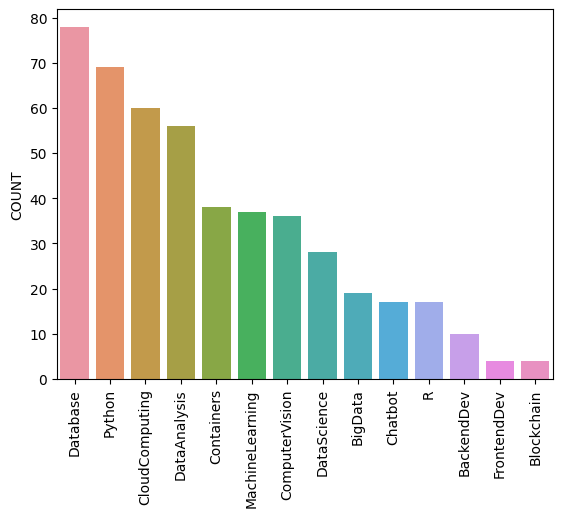

In [61]:
sns.barplot(x=genre_sums.index, y="COUNT", data=popular_genres)
plt.xticks(rotation = 90)
plt.show()

Now, you should have some solid understanding about all course metadata including the keywords in titles and popular course genres. Next, we will switch gears to exploring course learners related datasets.


###  Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [62]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing the ratings given by the user.


In [63]:
ratings_df['rating'].unique()

array([5, 3, 4])

The **rating** column consists of three potential values: 

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners. 

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements. 

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.


Let's see how many ratings we have in the dataset:


In [64]:
print(f"number of ratings in the dataset {ratings_df.shape[0]}")

number of ratings in the dataset 233306


We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


In [65]:
ratings_df.groupby('user').size()

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.


In [66]:
ratings_df.describe()

,user,rating
count,2.333060e+05,233306.000000
mean,1.099162e+06,3.998448
std,4.771661e+05,0.816058
min,2.000000e+00,3.000000
25%,7.210400e+05,3.000000
50%,1.080061e+06,4.000000
75%,1.466616e+06,5.000000
max,2.103039e+06,5.000000


We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


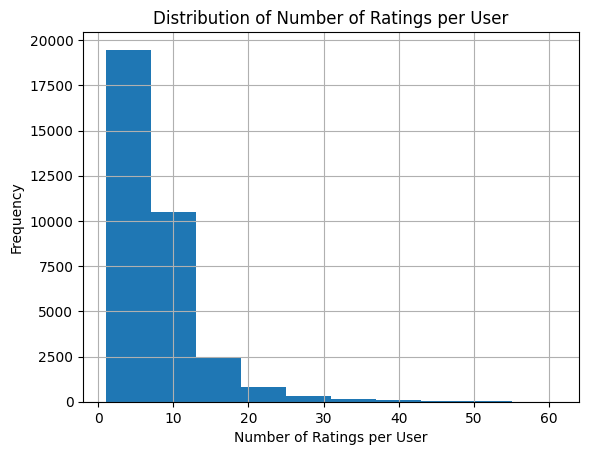

In [67]:
ratings_df.groupby('user').size().hist()
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per User')
plt.show()

### Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


In [68]:
ratings_per_user = ratings_df.groupby('item').size().reset_index()
ratings_per_user.columns = ['course', 'Ratings']
ratings_per_user = ratings_per_user.sort_values(by='Ratings', ascending=False).reset_index(drop=True)
top_courses = ratings_per_user.head(20)
print(top_courses)

        course  Ratings
0     PY0101EN    14936
1     DS0101EN    14477
2     BD0101EN    13291
3     BD0111EN    10599
4     DA0101EN     8303
5     DS0103EN     7719
6   ML0101ENv3     7644
7     BD0211EN     7551
8     DS0105EN     7199
9     BC0101EN     6719
10    DV0101EN     6709
11    ML0115EN     6323
12    CB0103EN     5512
13    RP0101EN     5237
14    ST0101EN     5015
15    CC0101EN     4983
16    CO0101EN     4480
17    DB0101EN     3697
18    BD0115EN     3670
19    DS0301EN     3624


In [69]:
course_mapping = course_df.set_index('COURSE_ID')['TITLE'].to_dict()

# Map 'course' column in ratings_per_user to 'TITLE' in course_df using the mapping dictionary
ratings_per_user['TITLE'] = ratings_per_user['course'].map(course_mapping)
print(ratings_per_user.head(20))

        course  Ratings                                         TITLE
0     PY0101EN    14936                       python for data science
1     DS0101EN    14477                  introduction to data science
2     BD0101EN    13291                                  big data 101
3     BD0111EN    10599                                    hadoop 101
4     DA0101EN     8303                     data analysis with python
5     DS0103EN     7719                      data science methodology
6   ML0101ENv3     7644                  machine learning with python
7     BD0211EN     7551                          spark fundamentals i
8     DS0105EN     7199  data science hands on with open source tools
9     BC0101EN     6719                         blockchain essentials
10    DV0101EN     6709                data visualization with python
11    ML0115EN     6323                             deep learning 101
12    CB0103EN     5512                        build your own chatbot
13    RP0101EN     5

It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [72]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [73]:
# Get the top course enrollments again
top = top_courses['Ratings'].values.sum()

In [74]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%
